In [1]:
import pickle 
import torch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from collections import Counter

In [7]:
with open('curvature_output/dataset_GGNet_enhanced.pkl', 'rb') as f:
    enhanced_ggnet_dict = pickle.load(f)

for key in enhanced_ggnet_dict.keys():
    print(key, type(enhanced_ggnet_dict[key]), len(enhanced_ggnet_dict[key]) if type(enhanced_ggnet_dict[key]) in [list] else enhanced_ggnet_dict[key].shape)
    
print(enhanced_ggnet_dict['edge_feature_names'])
features = enhanced_ggnet_dict['feature'].numpy()
feature_names = enhanced_ggnet_dict['feature_name']
nodes = enhanced_ggnet_dict['node_name']

enhanced_feature_df = pd.DataFrame(
    data = features,
    index = nodes,
    columns = feature_names
)
print(enhanced_feature_df[['ollivier_mean', 'ollivier_median', 'ollivier_max', 'ollivier_degree']].head())

feature <class 'torch.Tensor'> torch.Size([11183, 73])
node_name <class 'list'> 11183
edge_index <class 'torch.Tensor'> torch.Size([2, 1243976])
feature_name <class 'list'> 73
label <class 'torch.Tensor'> torch.Size([11183])
mask <class 'numpy.ndarray'> (11183,)
ollivier_curvature <class 'torch.Tensor'> torch.Size([1243976])
forman_curvature <class 'torch.Tensor'> torch.Size([1243976])
edge_features <class 'torch.Tensor'> torch.Size([1243976, 122])
edge_feature_names <class 'list'> 122
['src_MF: KIRC', 'src_MF: BRCA', 'src_MF: READ', 'src_MF: PRAD', 'src_MF: STAD', 'src_MF: HNSC', 'src_MF: LUAD', 'src_MF: THCA', 'src_MF: BLCA', 'src_MF: ESCA', 'src_MF: LIHC', 'src_MF: UCEC', 'src_MF: COAD', 'src_MF: LUSC', 'src_MF: CESC', 'src_MF: KIRP', 'src_METH: KIRC', 'src_METH: BRCA', 'src_METH: READ', 'src_METH: PRAD', 'src_METH: STAD', 'src_METH: HNSC', 'src_METH: LUAD', 'src_METH: THCA', 'src_METH: BLCA', 'src_METH: ESCA', 'src_METH: LIHC', 'src_METH: UCEC', 'src_METH: COAD', 'src_METH: LUSC', 

In [3]:
with open('curvature_output/dataset_PathNet_enhanced.pkl', 'rb') as f:
    enhanced_ggnet_dict = pickle.load(f)
    
features = enhanced_ggnet_dict['feature'].numpy()
feature_names = enhanced_ggnet_dict['feature_name']
nodes = enhanced_ggnet_dict['node_name']

enhanced_feature_df = pd.DataFrame(
    data = features,
    index = nodes,
    columns = feature_names
)
print(enhanced_feature_df[['ollivier_mean', 'ollivier_median', 'ollivier_max', 'ollivier_degree']].head())

        ollivier_mean  ollivier_median  ollivier_max  ollivier_degree
TBP         -0.432993         0.146108      0.522807         1.421878
RPS20        2.409599         2.776338      2.239422         1.628600
SUPT5H       1.451118         1.186949      1.372226         0.962495
GNB4        -0.392071        -0.531486      1.987948         2.639242
MTA3        -0.417796        -0.340410     -0.071373        -0.185962


In [4]:
with open('curvature_output/dataset_PPNet_enhanced.pkl', 'rb') as f:
    enhanced_ggnet_dict = pickle.load(f)
    
features = enhanced_ggnet_dict['feature'].numpy()
feature_names = enhanced_ggnet_dict['feature_name']
nodes = enhanced_ggnet_dict['node_name']

enhanced_feature_df = pd.DataFrame(
    data = features,
    index = nodes,
    columns = feature_names
)
print(enhanced_feature_df[['ollivier_mean', 'ollivier_median', 'ollivier_max', 'ollivier_degree']].head())

          ollivier_mean  ollivier_median  ollivier_max  ollivier_degree
PAF1          -0.014888        -0.040053      0.873455         0.193961
AEBP2          0.108093        -0.095793      0.469885        -0.211484
TBP           -0.508138        -0.471342     -0.310389         1.619561
RPS20          0.315561         0.369951      0.757003         2.535084
SNRNP200       1.128775         1.300502      0.853098         1.828823


In [5]:
print(enhanced_feature_df.columns)

Index(['MF: KIRC', 'MF: BRCA', 'MF: READ', 'MF: PRAD', 'MF: STAD', 'MF: HNSC',
       'MF: LUAD', 'MF: THCA', 'MF: BLCA', 'MF: ESCA', 'MF: LIHC', 'MF: UCEC',
       'MF: COAD', 'MF: LUSC', 'MF: CESC', 'MF: KIRP', 'METH: KIRC',
       'METH: BRCA', 'METH: READ', 'METH: PRAD', 'METH: STAD', 'METH: HNSC',
       'METH: LUAD', 'METH: THCA', 'METH: BLCA', 'METH: ESCA', 'METH: LIHC',
       'METH: UCEC', 'METH: COAD', 'METH: LUSC', 'METH: CESC', 'METH: KIRP',
       'GE: KIRC', 'GE: BRCA', 'GE: READ', 'GE: PRAD', 'GE: STAD', 'GE: HNSC',
       'GE: LUAD', 'GE: THCA', 'GE: BLCA', 'GE: ESCA', 'GE: LIHC', 'GE: UCEC',
       'GE: COAD', 'GE: LUSC', 'GE: CESC', 'GE: KIRP', 'ohnolog',
       'essentiality_percentage', 'essentiality_oneCellLine',
       'expressed_tissues_rnaseq', 'ppin_degree', 'ppin_hub',
       'ppin_betweenness', 'ppin_clustering', 'complexes', 'mirna',
       'ollivier_mean', 'ollivier_std', 'ollivier_min', 'ollivier_max',
       'ollivier_median', 'ollivier_degree', 'forman_m

DESCRIPTIVE STATISTICS FOR CURVATURE FEATURES

--- OLLIVIER CURVATURE ---
       ollivier_mean  ollivier_std  ollivier_min  ollivier_max  \
count   1.139500e+04  11395.000000  1.139500e+04  1.139500e+04   
mean    2.678155e-09      0.000000  2.142524e-08 -2.142524e-08   
std     1.000039e+00      1.000030  1.000049e+00  1.000039e+00   
min    -2.694820e+00     -1.526521 -1.975553e+00 -3.460129e+00   
25%    -6.045046e-01     -0.699209 -6.935535e-01 -9.017553e-01   
50%    -1.672793e-01      0.086005 -1.425364e-01  1.831418e-01   
75%     4.446078e-01      0.647638  5.071651e-01  8.031745e-01   
max     4.015354e+00      3.382757  3.838496e+00  2.985385e+00   

       ollivier_median  ollivier_degree  
count     1.139500e+04     1.139500e+04  
mean     -2.678155e-09    -1.071262e-08  
std       1.000048e+00     9.999965e-01  
min      -2.735957e+00    -6.430880e-01  
25%      -6.172671e-01    -6.038513e-01  
50%      -2.108917e-01    -4.599834e-01  
75%       5.142710e-01     1.678035e-

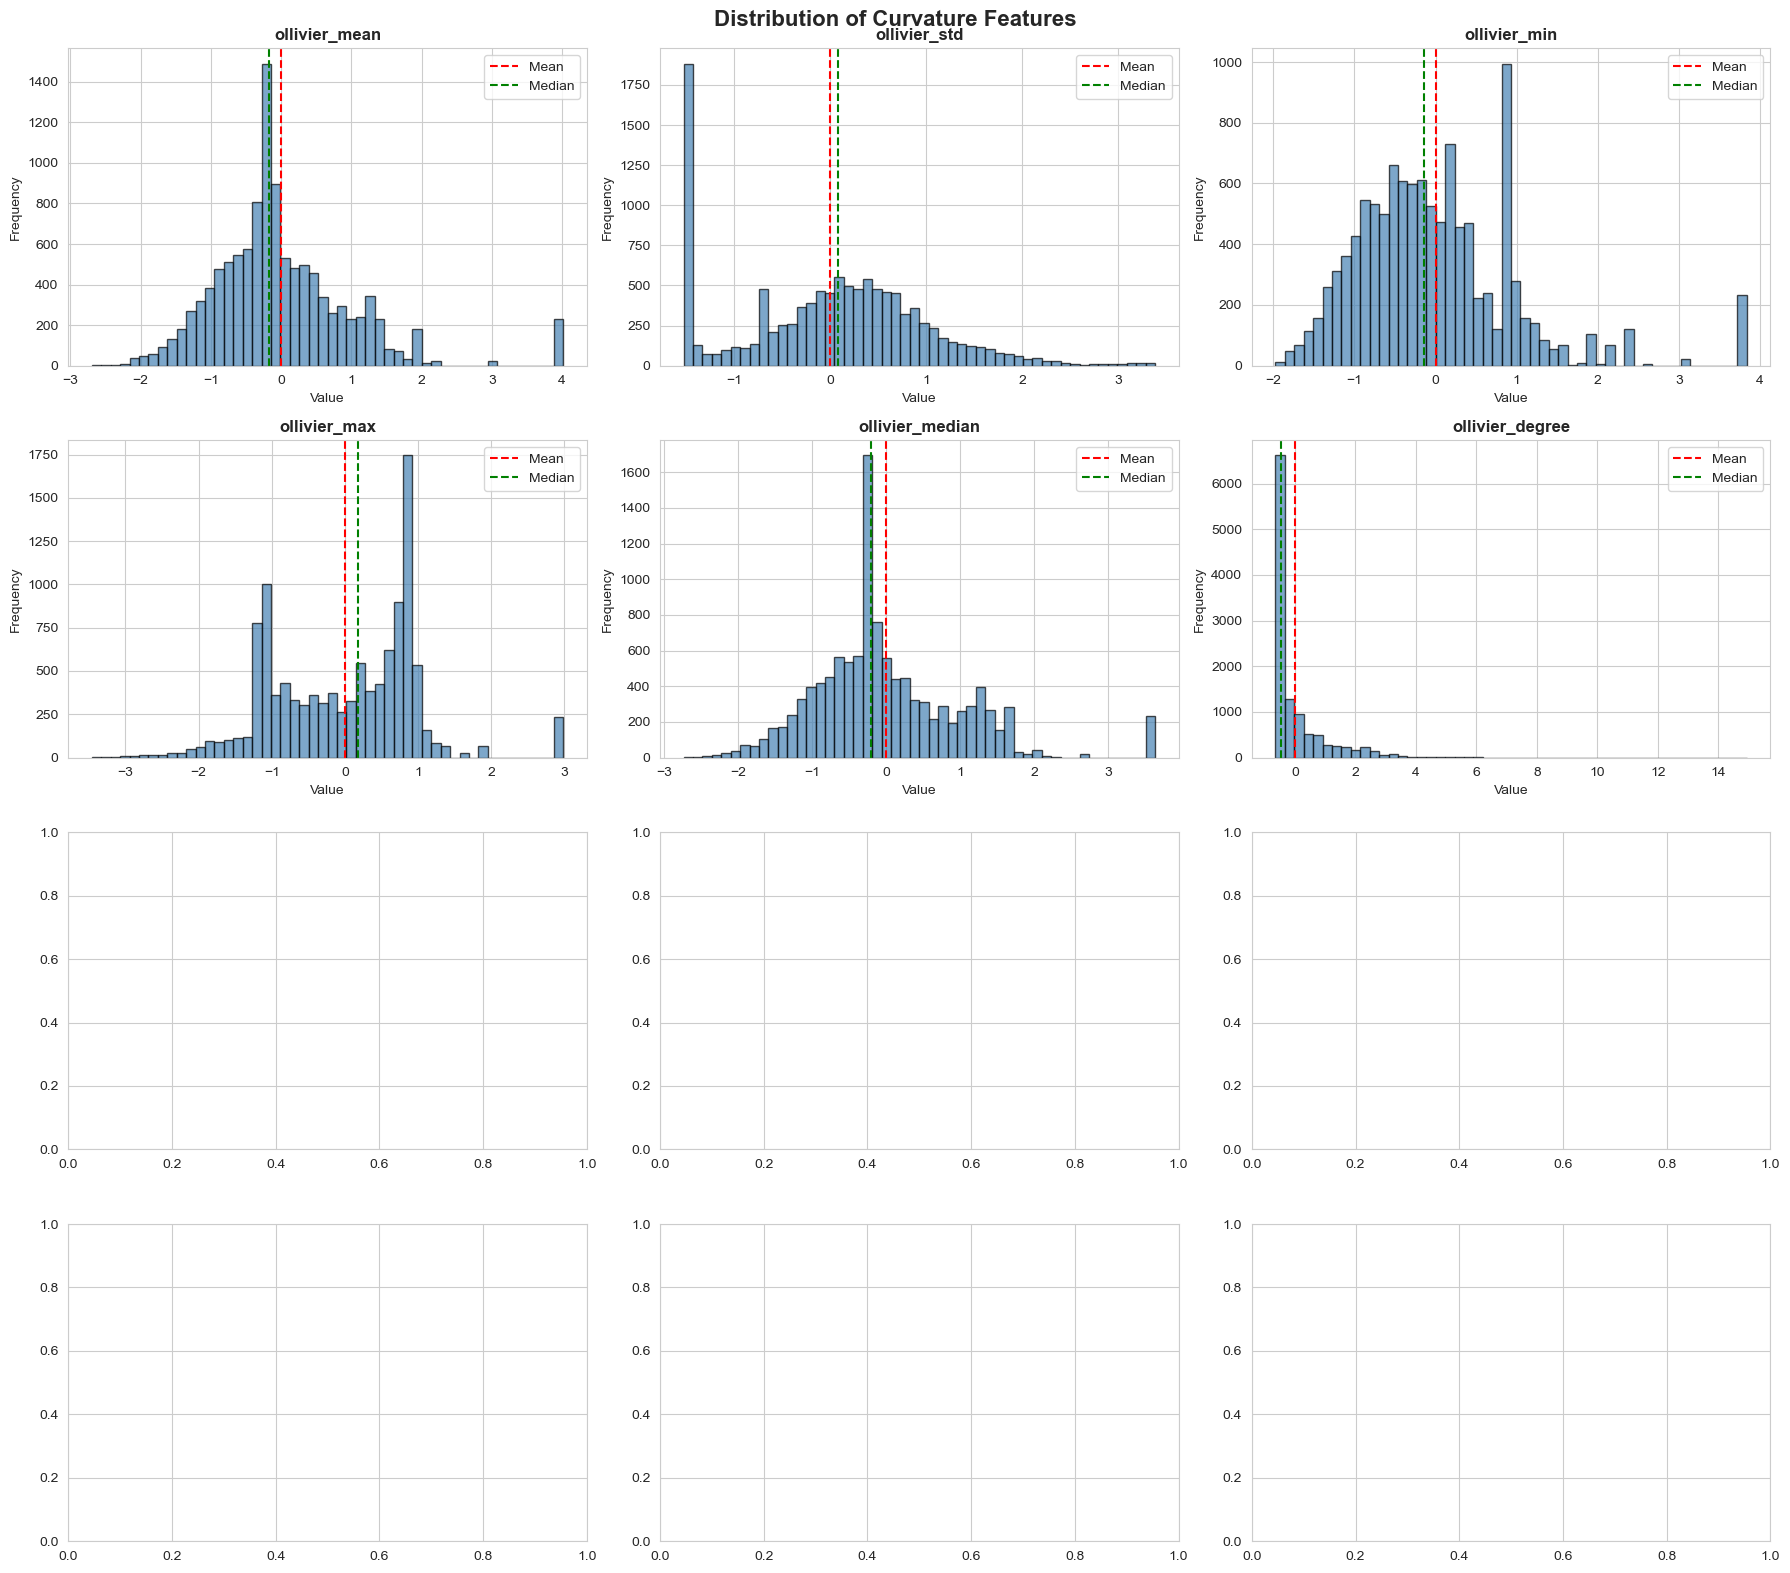

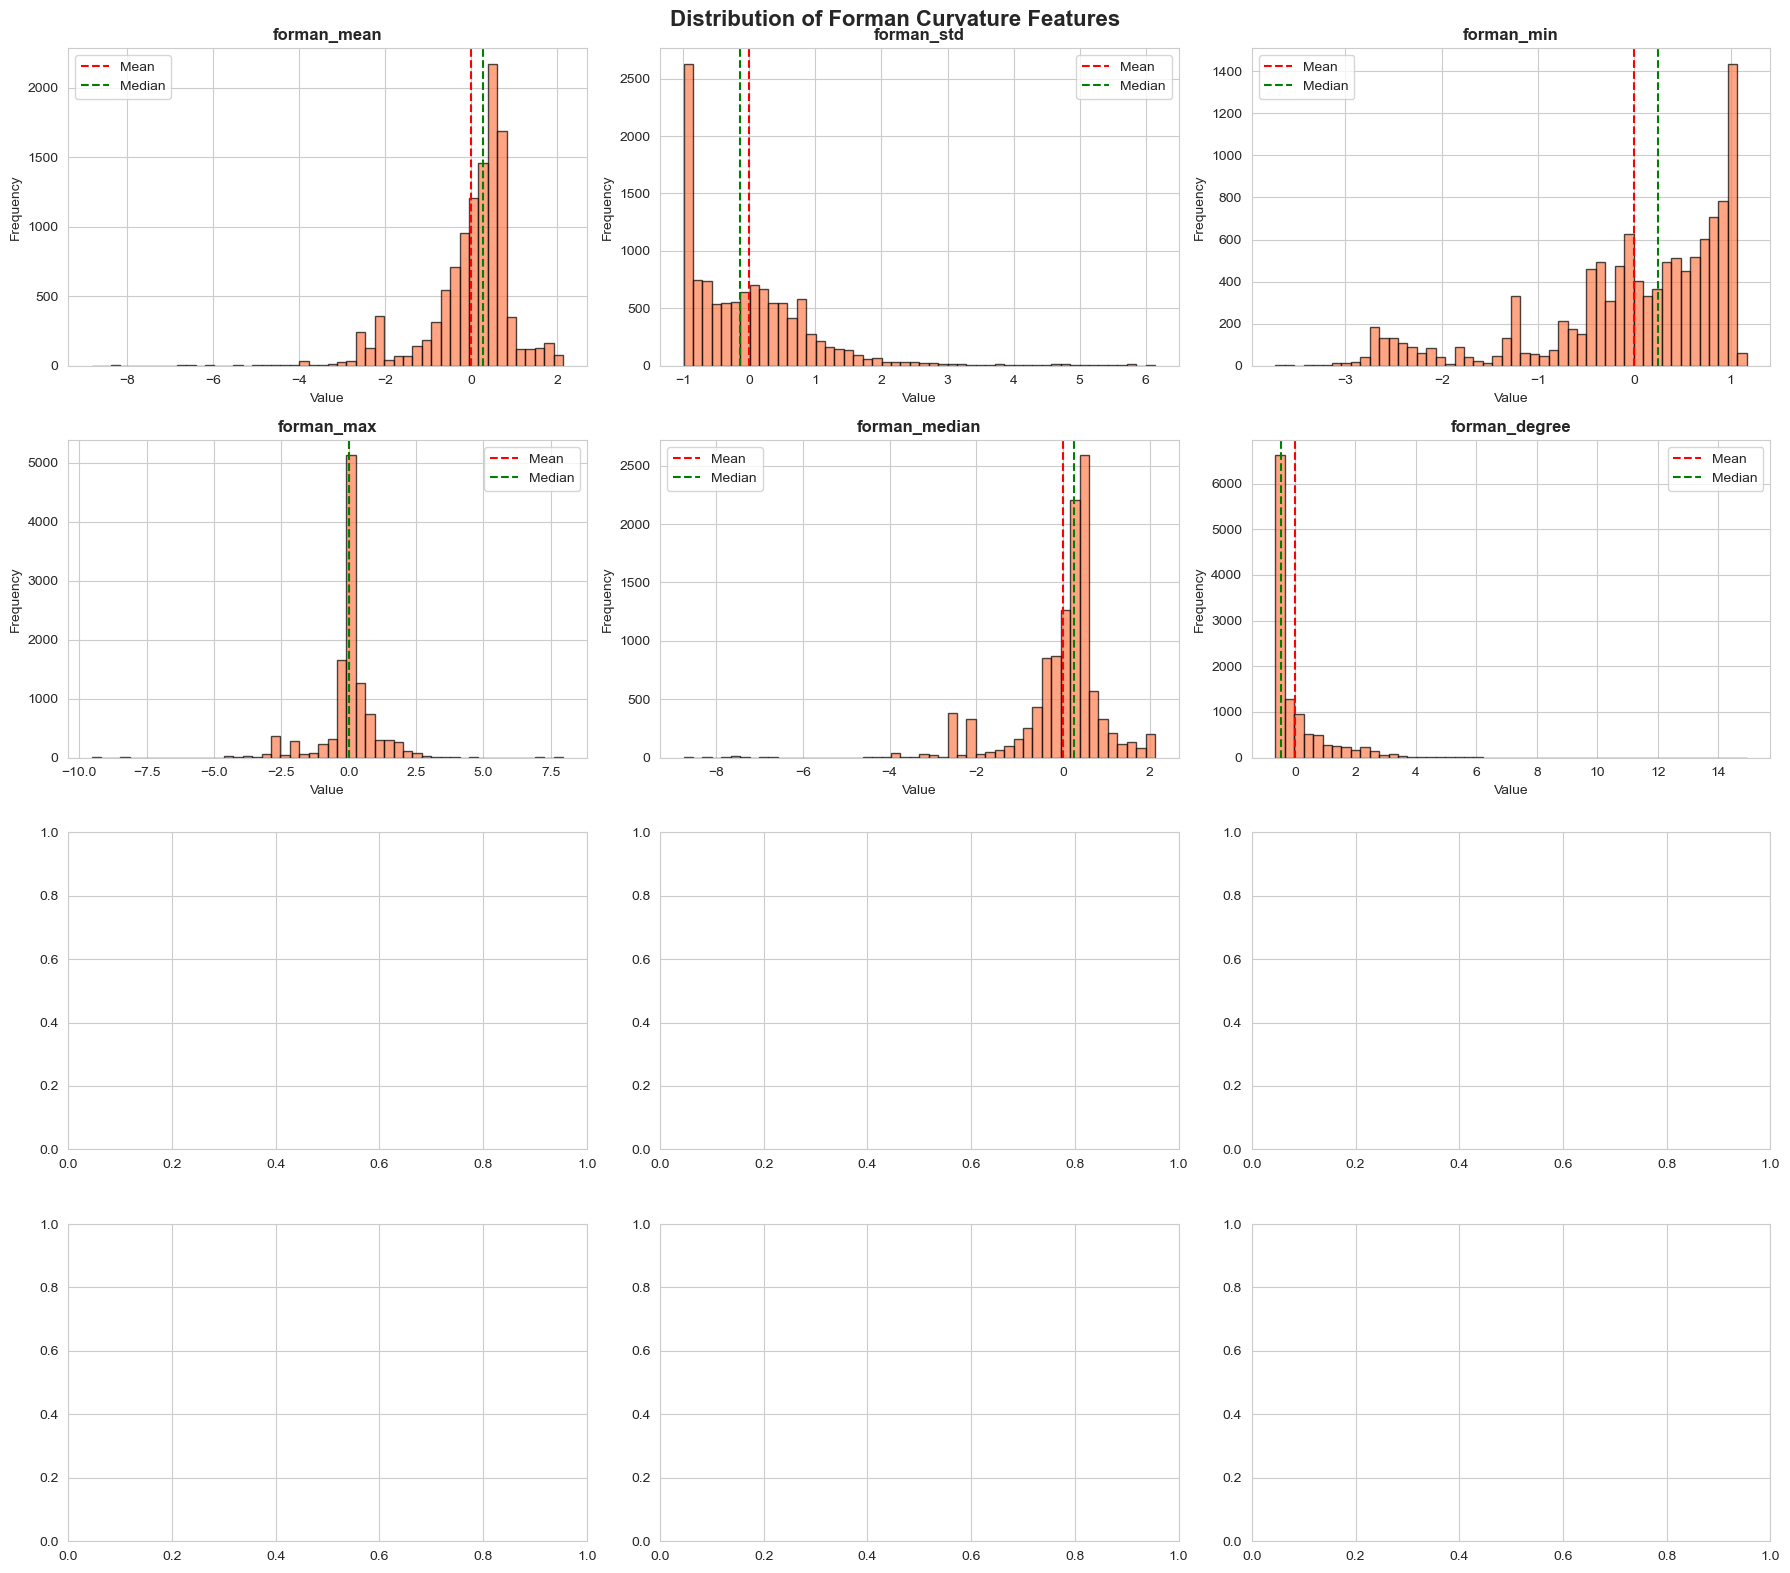

C:\Users\siddh\AppData\Local\Temp\ipykernel_93216\2802483031.py:93: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot([df[col].dropna() for col in ollivier_cols],
C:\Users\siddh\AppData\Local\Temp\ipykernel_93216\2802483031.py:101: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot([df[col].dropna() for col in forman_cols],


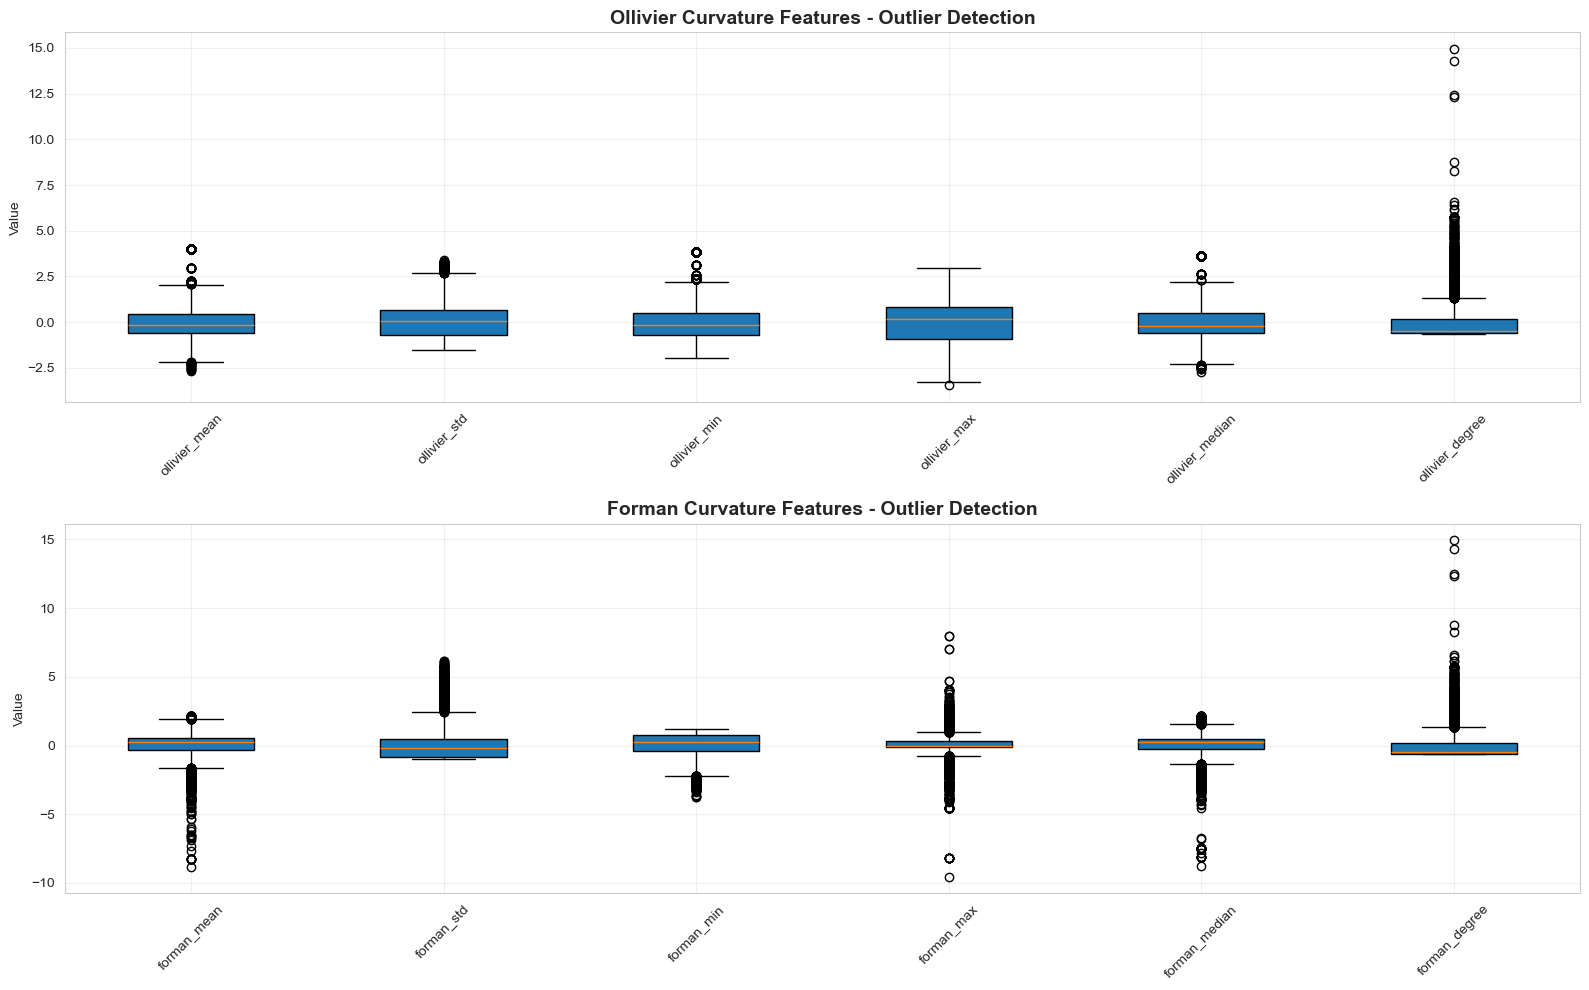


CORRELATION ANALYSIS

--- Ollivier Features Correlation ---
                 ollivier_mean  ollivier_std  ollivier_min  ollivier_max  \
ollivier_mean         1.000000     -0.165111      0.656123      0.742324   
ollivier_std         -0.165111      1.000000     -0.652951      0.381701   
ollivier_min          0.656123     -0.652951      1.000000      0.205370   
ollivier_max          0.742324      0.381701      0.205370      1.000000   
ollivier_median       0.967328     -0.103765      0.556663      0.702156   
ollivier_degree       0.130341      0.132304     -0.291002      0.301662   

                 ollivier_median  ollivier_degree  
ollivier_mean           0.967328         0.130341  
ollivier_std           -0.103765         0.132304  
ollivier_min            0.556663        -0.291002  
ollivier_max            0.702156         0.301662  
ollivier_median         1.000000         0.171173  
ollivier_degree         0.171173         1.000000  

--- Forman Features Correlation ---
     

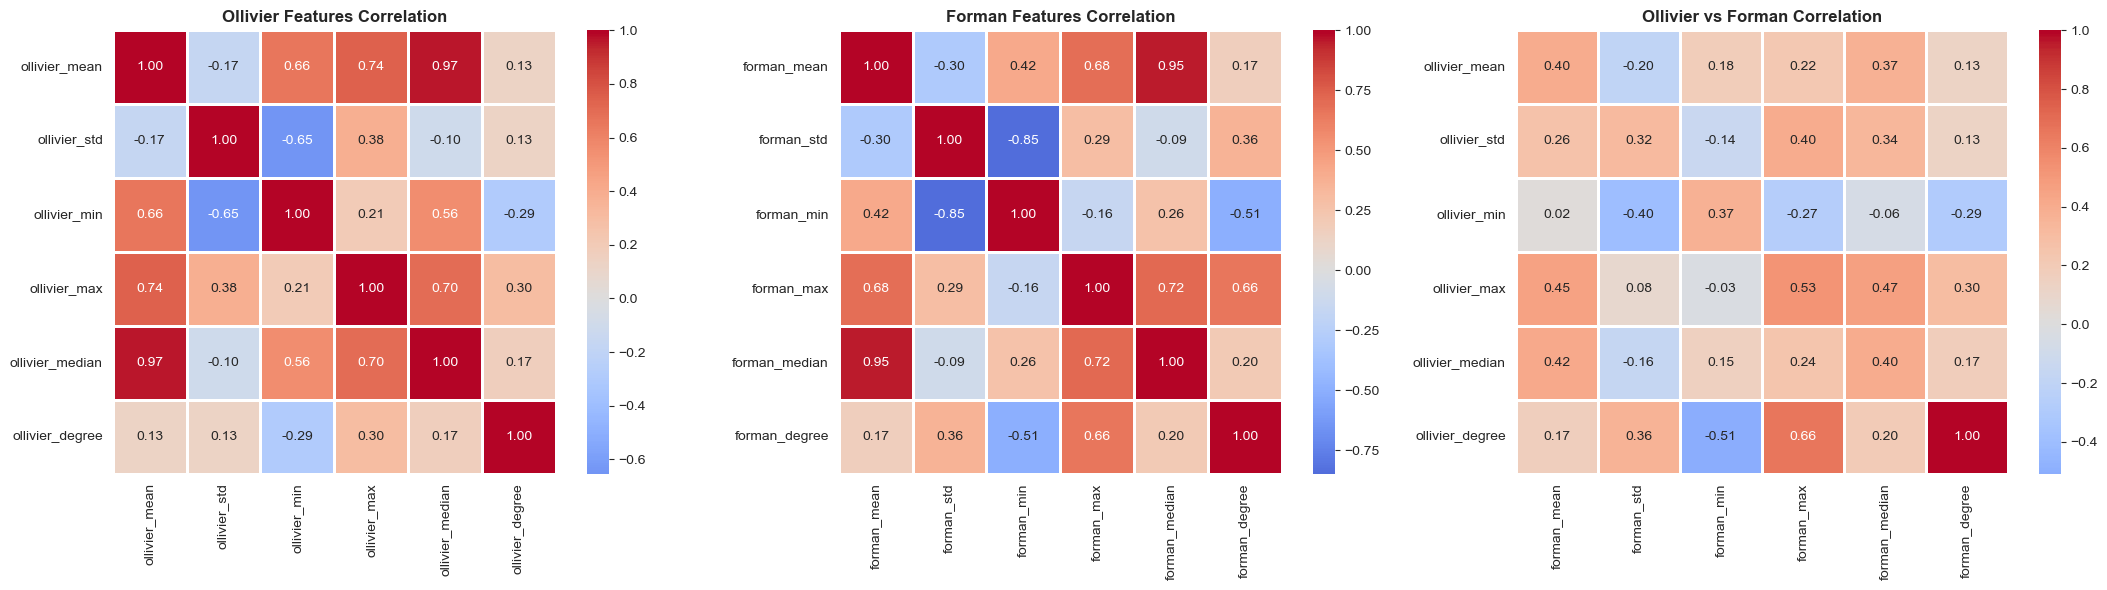

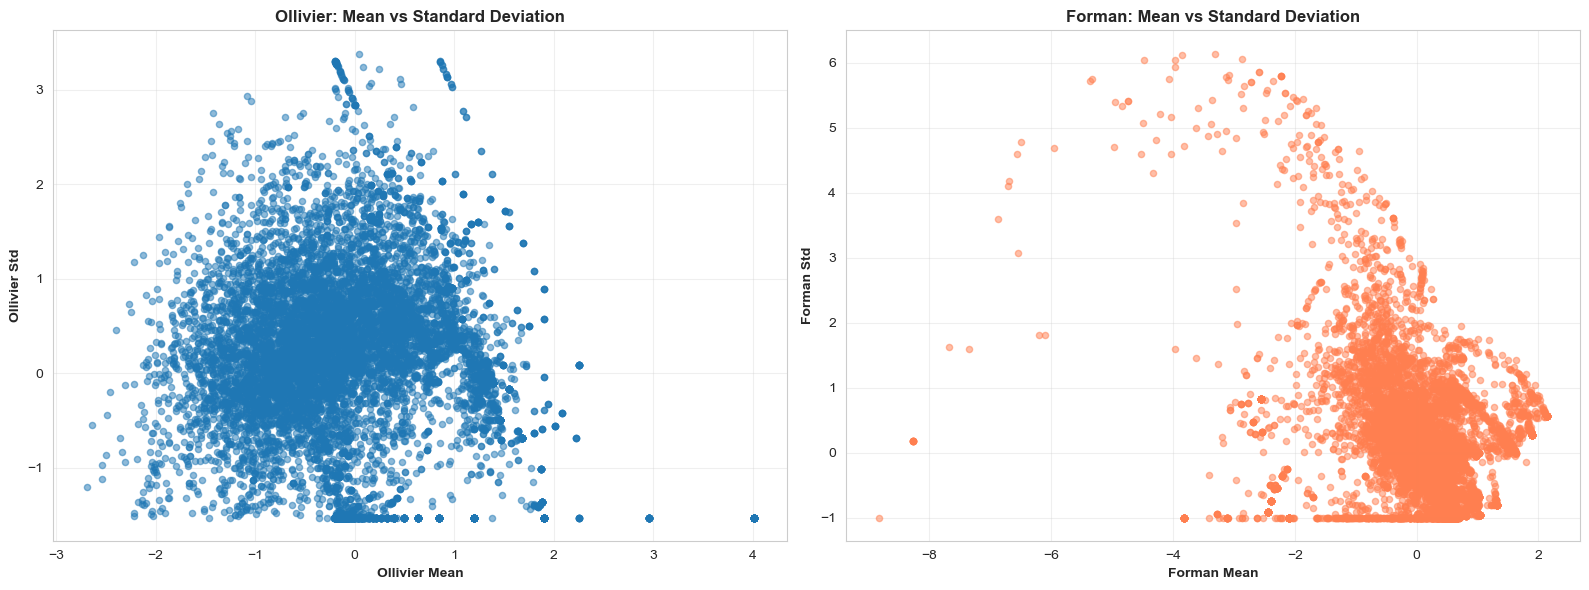

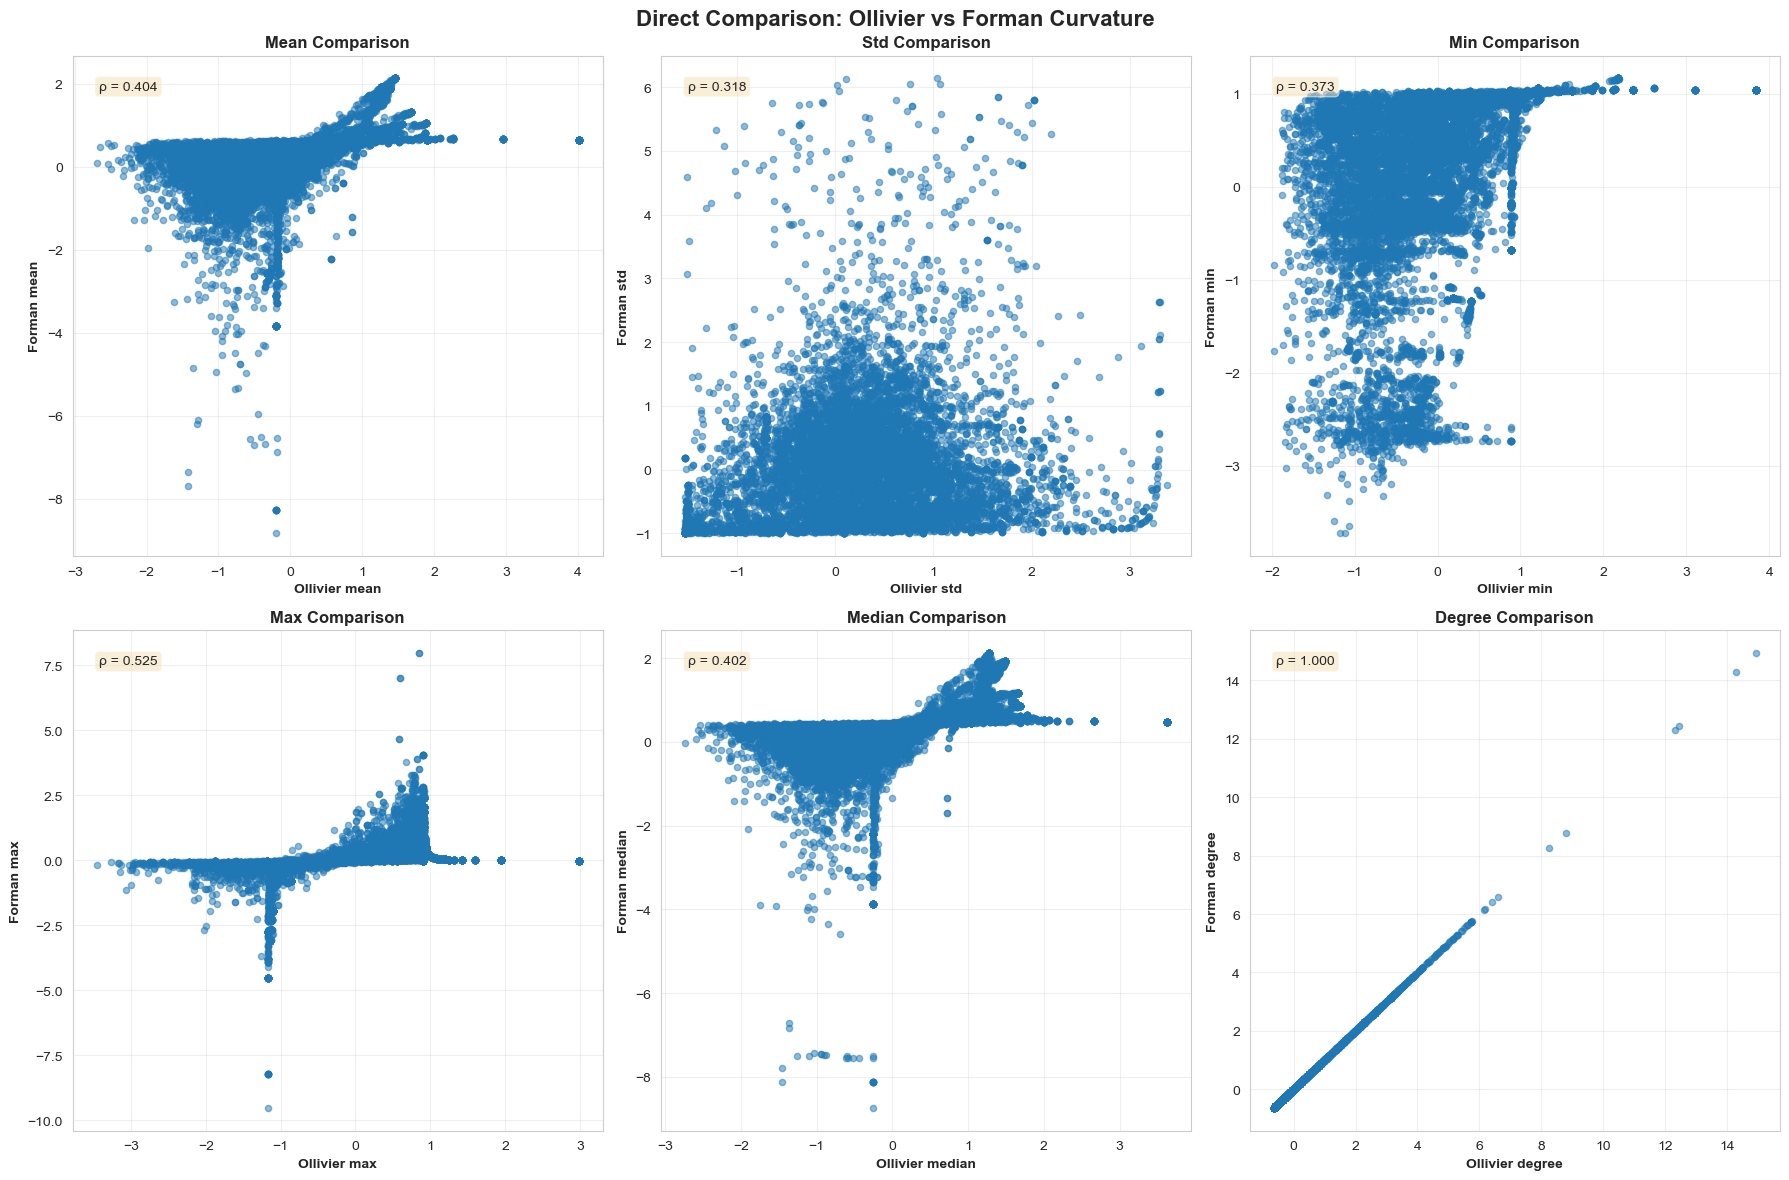


POSITIVE VS NEGATIVE CURVATURE DEGREE ANALYSIS

Positive Curvature Degree Stats:
count    1.139500e+04
mean     1.071262e-08
std      1.000053e+00
min     -5.604967e-01
25%     -5.430480e-01
50%     -4.558044e-01
75%      5.020852e-02
max      5.947876e+00
Name: positive_curvature_degree, dtype: float64

Negative Curvature Degree Stats:
count    1.139500e+04
mean    -2.142524e-08
std      9.999849e-01
min     -2.935354e-01
25%     -2.935354e-01
50%     -2.609819e-01
75%     -9.821460e-02
max      2.832096e+01
Name: negative_curvature_degree, dtype: float64


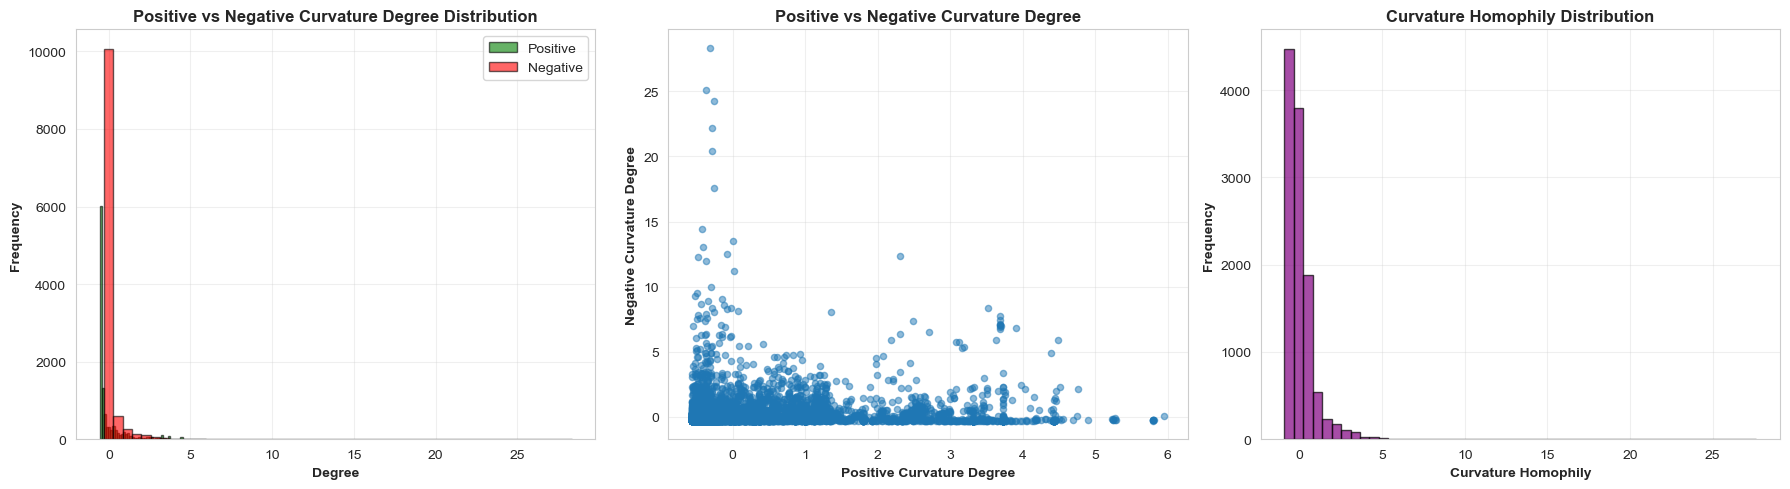


NORMALITY TESTS (Shapiro-Wilk)
ollivier_mean                  | Statistic: 0.9084 | p-value: 9.5066e-48 | Normal: False
ollivier_std                   | Statistic: 0.9605 | p-value: 7.3148e-35 | Normal: False
ollivier_min                   | Statistic: 0.9137 | p-value: 9.2845e-47 | Normal: False
ollivier_max                   | Statistic: 0.9473 | p-value: 4.7629e-39 | Normal: False
ollivier_median                | Statistic: 0.9393 | p-value: 3.4616e-41 | Normal: False
ollivier_degree                | Statistic: 0.6564 | p-value: 3.0068e-72 | Normal: False
forman_mean                    | Statistic: 0.8326 | p-value: 2.8441e-58 | Normal: False
forman_std                     | Statistic: 0.8293 | p-value: 1.2354e-58 | Normal: False
forman_min                     | Statistic: 0.8618 | p-value: 8.2895e-55 | Normal: False
forman_max                     | Statistic: 0.8062 | p-value: 5.3798e-61 | Normal: False
forman_median                  | Statistic: 0.8010 | p-value: 1.7157e-61 | Nor

In [5]:

import seaborn as sns
from scipy import stats

df = enhanced_feature_df.copy()

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)

# Load your data
# df = pd.read_csv('your_data.csv')

# Define curvature-related columns
ollivier_cols = ['ollivier_mean', 'ollivier_std', 'ollivier_min', 'ollivier_max', 
                 'ollivier_median', 'ollivier_degree']
forman_cols = ['forman_mean', 'forman_std', 'forman_min', 'forman_max', 
               'forman_median', 'forman_degree']
other_curvature_cols = ['positive_curvature_degree', 'negative_curvature_degree', 
                        'curvature_homophily']
all_curvature_cols = ollivier_cols + forman_cols + other_curvature_cols

# ============================================================================
# 1. BASIC STATISTICS
# ============================================================================
print("="*80)
print("DESCRIPTIVE STATISTICS FOR CURVATURE FEATURES")
print("="*80)

print("\n--- OLLIVIER CURVATURE ---")
print(df[ollivier_cols].describe())

print("\n--- FORMAN CURVATURE ---")
print(df[forman_cols].describe())

print("\n--- OTHER CURVATURE FEATURES ---")
print(df[other_curvature_cols].describe())

# ============================================================================
# 2. MISSING VALUES ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("MISSING VALUES ANALYSIS")
print("="*80)
missing_values = df[all_curvature_cols].isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage': missing_percentage
})
print(missing_df[missing_df['Missing Count'] > 0])

# ============================================================================
# 3. DISTRIBUTION PLOTS
# ============================================================================
fig, axes = plt.subplots(4, 3, figsize=(18, 16))
fig.suptitle('Distribution of Curvature Features', fontsize=16, fontweight='bold')

for idx, col in enumerate(ollivier_cols):
    row, col_idx = idx // 3, idx % 3
    axes[row, col_idx].hist(df[col].dropna(), bins=50, edgecolor='black', alpha=0.7, color='steelblue')
    axes[row, col_idx].set_title(f'{col}', fontweight='bold')
    axes[row, col_idx].set_xlabel('Value')
    axes[row, col_idx].set_ylabel('Frequency')
    axes[row, col_idx].axvline(df[col].mean(), color='red', linestyle='--', label='Mean')
    axes[row, col_idx].axvline(df[col].median(), color='green', linestyle='--', label='Median')
    axes[row, col_idx].legend()

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(4, 3, figsize=(18, 16))
fig.suptitle('Distribution of Forman Curvature Features', fontsize=16, fontweight='bold')

for idx, col in enumerate(forman_cols):
    row, col_idx = idx // 3, idx % 3
    axes[row, col_idx].hist(df[col].dropna(), bins=50, edgecolor='black', alpha=0.7, color='coral')
    axes[row, col_idx].set_title(f'{col}', fontweight='bold')
    axes[row, col_idx].set_xlabel('Value')
    axes[row, col_idx].set_ylabel('Frequency')
    axes[row, col_idx].axvline(df[col].mean(), color='red', linestyle='--', label='Mean')
    axes[row, col_idx].axvline(df[col].median(), color='green', linestyle='--', label='Median')
    axes[row, col_idx].legend()

plt.tight_layout()
plt.show()

# ============================================================================
# 4. BOX PLOTS FOR OUTLIER DETECTION
# ============================================================================
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Ollivier boxplots
axes[0].boxplot([df[col].dropna() for col in ollivier_cols], 
                labels=ollivier_cols, patch_artist=True)
axes[0].set_title('Ollivier Curvature Features - Outlier Detection', fontweight='bold', fontsize=14)
axes[0].set_ylabel('Value')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3)

# Forman boxplots
axes[1].boxplot([df[col].dropna() for col in forman_cols], 
                labels=forman_cols, patch_artist=True)
axes[1].set_title('Forman Curvature Features - Outlier Detection', fontweight='bold', fontsize=14)
axes[1].set_ylabel('Value')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# 5. CORRELATION ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("CORRELATION ANALYSIS")
print("="*80)

# Correlation within Ollivier features
print("\n--- Ollivier Features Correlation ---")
ollivier_corr = df[ollivier_cols].corr()
print(ollivier_corr)

# Correlation within Forman features
print("\n--- Forman Features Correlation ---")
forman_corr = df[forman_cols].corr()
print(forman_corr)

# Cross-correlation between Ollivier and Forman
print("\n--- Ollivier vs Forman Correlation ---")
cross_corr = df[ollivier_cols + forman_cols].corr().loc[ollivier_cols, forman_cols]
print(cross_corr)

# Correlation heatmap
fig, axes = plt.subplots(1, 3, figsize=(22, 6))

# Ollivier heatmap
sns.heatmap(ollivier_corr, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            ax=axes[0], square=True, linewidths=1)
axes[0].set_title('Ollivier Features Correlation', fontweight='bold', fontsize=12)

# Forman heatmap
sns.heatmap(forman_corr, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            ax=axes[1], square=True, linewidths=1)
axes[1].set_title('Forman Features Correlation', fontweight='bold', fontsize=12)

# Cross-correlation heatmap
sns.heatmap(cross_corr, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            ax=axes[2], linewidths=1)
axes[2].set_title('Ollivier vs Forman Correlation', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

# ============================================================================
# 6. SCATTER PLOTS: MEAN VS STD
# ============================================================================
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Ollivier mean vs std
axes[0].scatter(df['ollivier_mean'], df['ollivier_std'], alpha=0.5, s=20)
axes[0].set_xlabel('Ollivier Mean', fontweight='bold')
axes[0].set_ylabel('Ollivier Std', fontweight='bold')
axes[0].set_title('Ollivier: Mean vs Standard Deviation', fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Forman mean vs std
axes[1].scatter(df['forman_mean'], df['forman_std'], alpha=0.5, s=20, color='coral')
axes[1].set_xlabel('Forman Mean', fontweight='bold')
axes[1].set_ylabel('Forman Std', fontweight='bold')
axes[1].set_title('Forman: Mean vs Standard Deviation', fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# 7. COMPARING OLLIVIER VS FORMAN DIRECTLY
# ============================================================================
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Direct Comparison: Ollivier vs Forman Curvature', fontsize=16, fontweight='bold')

metrics = ['mean', 'std', 'min', 'max', 'median', 'degree']
for idx, metric in enumerate(metrics):
    row, col = idx // 3, idx % 3
    ollivier_col = f'ollivier_{metric}'
    forman_col = f'forman_{metric}'
    
    axes[row, col].scatter(df[ollivier_col], df[forman_col], alpha=0.5, s=20)
    axes[row, col].set_xlabel(f'Ollivier {metric}', fontweight='bold')
    axes[row, col].set_ylabel(f'Forman {metric}', fontweight='bold')
    axes[row, col].set_title(f'{metric.capitalize()} Comparison', fontweight='bold')
    
    # Add correlation coefficient
    corr_val = df[[ollivier_col, forman_col]].corr().iloc[0, 1]
    axes[row, col].text(0.05, 0.95, f'ρ = {corr_val:.3f}', 
                        transform=axes[row, col].transAxes, 
                        verticalalignment='top',
                        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# 8. POSITIVE VS NEGATIVE CURVATURE DEGREE ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("POSITIVE VS NEGATIVE CURVATURE DEGREE ANALYSIS")
print("="*80)

print(f"\nPositive Curvature Degree Stats:")
print(df['positive_curvature_degree'].describe())

print(f"\nNegative Curvature Degree Stats:")
print(df['negative_curvature_degree'].describe())

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Distribution comparison
axes[0].hist(df['positive_curvature_degree'].dropna(), bins=50, alpha=0.6, 
             label='Positive', color='green', edgecolor='black')
axes[0].hist(df['negative_curvature_degree'].dropna(), bins=50, alpha=0.6, 
             label='Negative', color='red', edgecolor='black')
axes[0].set_xlabel('Degree', fontweight='bold')
axes[0].set_ylabel('Frequency', fontweight='bold')
axes[0].set_title('Positive vs Negative Curvature Degree Distribution', fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Scatter plot
axes[1].scatter(df['positive_curvature_degree'], df['negative_curvature_degree'], 
                alpha=0.5, s=20)
axes[1].set_xlabel('Positive Curvature Degree', fontweight='bold')
axes[1].set_ylabel('Negative Curvature Degree', fontweight='bold')
axes[1].set_title('Positive vs Negative Curvature Degree', fontweight='bold')
axes[1].grid(True, alpha=0.3)

# Curvature homophily distribution
axes[2].hist(df['curvature_homophily'].dropna(), bins=50, 
             edgecolor='black', alpha=0.7, color='purple')
axes[2].set_xlabel('Curvature Homophily', fontweight='bold')
axes[2].set_ylabel('Frequency', fontweight='bold')
axes[2].set_title('Curvature Homophily Distribution', fontweight='bold')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# 9. NORMALITY TESTS
# ============================================================================
print("\n" + "="*80)
print("NORMALITY TESTS (Shapiro-Wilk)")
print("="*80)

for col in all_curvature_cols:
    data_clean = df[col].dropna()
    if len(data_clean) > 3:
        # Sample if too large (Shapiro-Wilk has limitations)
        if len(data_clean) > 5000:
            data_clean = data_clean.sample(5000, random_state=42)
        stat, p_value = stats.shapiro(data_clean)
        print(f"{col:30s} | Statistic: {stat:.4f} | p-value: {p_value:.4e} | Normal: {p_value > 0.05}")

# ============================================================================
# 10. SUMMARY STATISTICS TABLE
# ============================================================================
print("\n" + "="*80)
print("SUMMARY COMPARISON: OLLIVIER VS FORMAN")
print("="*80)

summary_data = []
for metric in ['mean', 'std', 'min', 'max', 'median']:
    ollivier_col = f'ollivier_{metric}'
    forman_col = f'forman_{metric}'
    
    summary_data.append({
        'Metric': metric.upper(),
        'Ollivier Mean': df[ollivier_col].mean(),
        'Ollivier Std': df[ollivier_col].std(),
        'Forman Mean': df[forman_col].mean(),
        'Forman Std': df[forman_col].std(),
        'Correlation': df[[ollivier_col, forman_col]].corr().iloc[0, 1]
    })

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

print("\n" + "="*80)
print("EDA COMPLETE!")
print("="*80)

In [14]:
with open('curvature_output/GGNet_contrastive_v2_priority_r0.2.pkl', 'rb') as f:
    dicc = pickle.load(f)
    
print(dicc.keys())
print(dicc['augmented_views'][0]['metadata'].keys())
print(dicc['original'].keys())
print(dicc['original']['feature_name'])
print(dicc['augmented_views'][0]['x'].shape)
print(dicc['augmented_views'][0]['metadata']['eliminated_node_ids'])

dict_keys(['original', 'augmented_views', 'num_views', 'augmentation_config'])
dict_keys(['original_nodes', 'augmented_nodes', 'eliminated_nodes', 'original_edges', 'added_edges', 'avg_clique_size', 'eliminated_node_ids', 'strategy', 'curvature_stats'])
dict_keys(['feature', 'node_name', 'edge_index', 'feature_name', 'label', 'mask', 'ollivier_curvature', 'forman_curvature', 'edge_features', 'edge_feature_names'])
['MF: KIRC', 'MF: BRCA', 'MF: READ', 'MF: PRAD', 'MF: STAD', 'MF: HNSC', 'MF: LUAD', 'MF: THCA', 'MF: BLCA', 'MF: ESCA', 'MF: LIHC', 'MF: UCEC', 'MF: COAD', 'MF: LUSC', 'MF: CESC', 'MF: KIRP', 'METH: KIRC', 'METH: BRCA', 'METH: READ', 'METH: PRAD', 'METH: STAD', 'METH: HNSC', 'METH: LUAD', 'METH: THCA', 'METH: BLCA', 'METH: ESCA', 'METH: LIHC', 'METH: UCEC', 'METH: COAD', 'METH: LUSC', 'METH: CESC', 'METH: KIRP', 'GE: KIRC', 'GE: BRCA', 'GE: READ', 'GE: PRAD', 'GE: STAD', 'GE: HNSC', 'GE: LUAD', 'GE: THCA', 'GE: BLCA', 'GE: ESCA', 'GE: LIHC', 'GE: UCEC', 'GE: COAD', 'GE: LUSC

In [22]:
import pickle
import numpy as np
import torch
import pandas as pd

with open('curvature_output/GGNet_contrastive_v2_priority_r0.2.pkl', 'rb') as f:
    dicc = pickle.load(f)

# Get original node names (not feature names!)
original_node_names = dicc['original']['node_name']
total_original_nodes = len(original_node_names)

# Get feature names (these are the column names for the features)
feature_column_names = dicc['original']['feature_name']

print(f"Total original nodes: {total_original_nodes}")
print(f"Number of features per node: {len(feature_column_names)}")

# Get augmented view
aug_view = dicc['augmented_views'][0]
metadata = aug_view['metadata']

# Get feature matrix
feature_matrix = aug_view['x']  # Shape: (num_nodes, num_features)
num_feature_rows = feature_matrix.shape[0]

print(f"\nFeature matrix shape: {feature_matrix.shape}")

# Get eliminated nodes
eliminated_node_ids = metadata['eliminated_node_ids']
if isinstance(eliminated_node_ids, torch.Tensor):
    eliminated_node_ids = eliminated_node_ids.tolist()

eliminated_ids_set = set(eliminated_node_ids)
original_remaining_ids = [i for i in range(total_original_nodes) if i not in eliminated_ids_set]

print(f"Eliminated nodes: {len(eliminated_node_ids)}")
print(f"Remaining original nodes: {len(original_remaining_ids)}")

# Create node name list for the augmented graph
node_names = []
for i in range(num_feature_rows):
    if i < len(original_remaining_ids):
        # Original node - use the actual node name
        orig_id = original_remaining_ids[i]
        node_names.append(original_node_names[orig_id])
    else:
        # Synthetic node
        node_names.append(f"SYNTHETIC_NODE_{i}")

# Convert feature matrix to numpy if it's a tensor
if isinstance(feature_matrix, torch.Tensor):
    feature_matrix_np = feature_matrix.numpy()
else:
    feature_matrix_np = feature_matrix

# Create DataFrame
df = pd.DataFrame(
    feature_matrix_np,
    index=node_names,
    columns=feature_column_names
)

print(f"\nDataFrame created!")
print(f"  Shape: {df.shape}")
print(f"  Rows (nodes): {len(df.index)}")
print(f"  Columns (features): {len(df.columns)}")

# Display first few rows
print("\n=== First 10 rows ===")
print(df.head())

# Display column names
print("\n=== Feature column names (first 10) ===")
print(df.columns.tolist()[:10])

# Display info about synthetic nodes if any
num_synthetic = sum(1 for name in node_names if name.startswith("SYNTHETIC"))
if num_synthetic > 0:
    print(f"\n⚠ DataFrame contains {num_synthetic} synthetic nodes")

# Show some eliminated nodes
if len(eliminated_node_ids) > 0:
    print(f"\n=== First 10 eliminated nodes ===")
    for i in range(min(10, len(eliminated_node_ids))):
        node_id = eliminated_node_ids[i]
        if node_id < len(original_node_names):
            print(f"  {original_node_names[node_id]}")

print("\n✓ DataFrame 'df' is ready to use!")

Total original nodes: 11183
Number of features per node: 73

Feature matrix shape: torch.Size([8947, 73])
Eliminated nodes: 2236
Remaining original nodes: 8947

DataFrame created!
  Shape: (8947, 73)
  Rows (nodes): 8947
  Columns (features): 73

=== First 10 rows ===
          MF: KIRC  MF: BRCA  MF: READ  MF: PRAD  MF: STAD  MF: HNSC  \
PAF1      0.012837  0.005314  0.000000  0.022613  0.012897  0.016466   
AEBP2     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
TBP       0.012819  0.005310  0.000000  0.000000  0.050806  0.010886   
RPS20     0.000000  0.000000  0.000000  0.000000  0.012781  0.000000   
SNRNP200  0.025649  0.031823  0.027725  0.067533  0.000000  0.005481   

          MF: LUAD  MF: THCA  MF: BLCA  MF: ESCA  ...  ollivier_degree  \
PAF1      0.040980  0.000000  0.030773  0.000000  ...        -0.314515   
AEBP2     0.000000  0.000000  0.000000  0.026986  ...         1.180085   
TBP       0.000000  0.003513  0.030373  0.000000  ...        -0.374959   
RP

In [6]:
with open('curvature_output/PathNet_contrastive_v2_priority_r0.2.pkl', 'rb') as f:
    dicct = pickle.load(f)
    f.close()
    
print(dicct['augmented_views'][1])

{'edge_index': tensor([[   0,  498,    0,  ..., 5974, 5955, 6185],
        [ 498,    0, 3806,  ..., 5951, 6185, 5955]]), 'edge_weight': tensor([1., 1., 1.,  ..., 1., 1., 1.]), 'x': tensor([[ 0.0128,  0.0053,  0.0000,  ...,  0.8880,  0.9042,  0.0122],
        [ 0.0000,  0.0000,  0.0000,  ...,  3.8061, -0.2485,  0.7839],
        [ 0.0256,  0.0212,  0.0544,  ...,  2.6875, -0.3445,  0.0703],
        ...,
        [ 0.0000,  0.0212,  0.0000,  ..., -0.4251, -0.3445, -0.0329],
        [ 0.0000,  0.0106,  0.0000,  ..., -0.3765, -0.3445, -0.3484],
        [ 0.0000,  0.0000,  0.0000,  ..., -0.3278, -0.3445, -0.0131]]), 'metadata': {'original_nodes': 7695, 'augmented_nodes': 6188, 'eliminated_nodes': 1539, 'original_edges': 90783, 'added_edges': 175, 'avg_clique_size': np.float64(0.39482415394824155), 'eliminated_node_ids': [12, 50, 52, 140, 164, 171, 184, 196, 197, 214, 224, 226, 253, 257, 293, 295, 319, 341, 351, 381, 387, 390, 432, 451, 454, 463, 472, 485, 509, 523, 536, 539, 549, 550, 557, 559